In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-27.00-22140'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  image_model=image_model)

tensorflow_version: 1.4.1
checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


feature_name attention
image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt start


image_model: <melt.image.image_model.ImageModel object at 0x7f5228918250>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt duration: 7.46774697304
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil/model.ckpt-10.98-9000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil/model.ckpt-10.98-9000.map start
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil/model.ckpt-10.98-9000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil/model.ckpt-10.98-9000.map duration: 2.5470700264


In [ ]:
from deepiu.util import idf
from deepiu.util import vocabulary
vocabulary.init('/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt')
vocab = vocabulary.vocab
idf_weights = idf.get_idf()

document_frequency_path /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid/valid_refs_document_frequency.dill
idf 0, 1, 2, 100 0.0 3.39355707979e-07 0.0503116598971 7.53636427776


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 6d36d83e50bfd4739c5e80027bb6e70dea643dd9


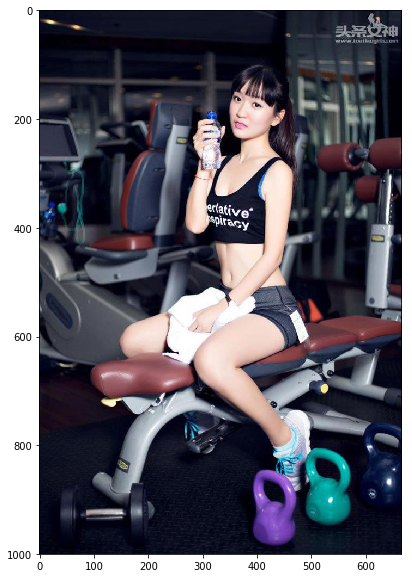

topwords of image:
0 健身房 4.14294|1 换 2.78024|2 器皿 2.34641|3 镖 2.33097|4 下滑 2.31163|5 烁 2.27398|6 仰卧起坐 2.17794|7 椅子 2.09733|8 体验 2.05757|9 推销 2.04946|10 坐在 1.94754|11 冰袋 1.9349|12 两本 1.91059|13 复健 1.85464|14 棕 1.84888|15 辛勤工作 1.84266|16 婴儿车 1.84193|17 内衣 1.82215|18 小兔子 1.78162|19 拳击 1.76996|20 脚趾甲 1.76379|21 哑铃 1.73147|22 速 1.72616|23 躺椅 1.72011|24 机器人 1.71804|25 安全带 1.71463|26 靴 1.68881|27 电线杆 1.67728|28 表情 1.67435|29 电子 1.67422|30 勾着 1.67367|31 陡 1.67019|32 乞 1.66283|33 一部 1.65757|34 人帮 1.63431|35 脐 1.6309|36 睡裙 1.62346|37 保龄球场 1.60792|38 健身器材 1.60426|39 码头 1.60153|40 更衣室 1.60122|41 防晒霜 1.59324|42 喇叭 1.58751|43 单脚 1.58612|44 送餐 1.58598|45 斑斑 1.57522|46 娱乐 1.55897|47 运动器材 1.55416|48 舞鞋 1.54683|49 水瓶 1.54036|50 吊起 1.53879|51 休息区 1.53391|52 码机 1.52748|53 针线活 1.52489|54 泡泡糖 1.52354|55 杂技 1.51002|56 扶梯 1.50729|57 裙角 1.50433|58 擦药 1.49928|59 很 1.49876|60 室内 1.49746|61 动感单车 1.49706|62 雪糕 1.47986|63 玩闹 1.47904|64 轮椅车 1.47723|65 开水 1.46733|66 饮水机 1.46641|67 哭 1.46483|68 钓 1.46301|69 器 1.45566|

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.550 seconds.
Prefix dict has been built succesfully.


瓶子
sim: [ 1.10004091]
idf sim [ 5.6156497]
text(q for exit): 手机
手机
sim: [ 0.99058378]
idf sim [ 3.57302856]
text(q for exit): q
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 3ae8676c240549d93ce4c0b63af865458a24b811


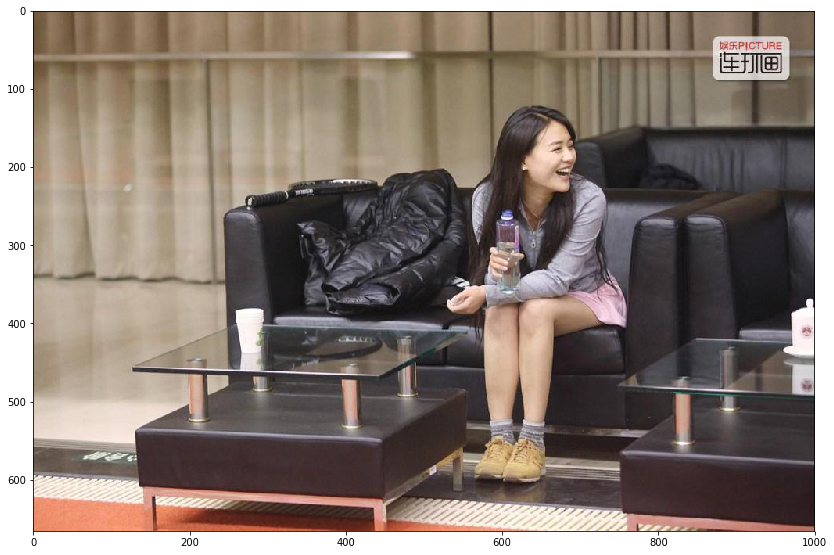

topwords of image:
0 沙发 2.26545|1 二郎腿 2.06644|2 桑拿房 1.85974|3 椅子 1.80632|4 座椅 1.79238|5 针线活 1.68257|6 题 1.58744|7 坐在 1.48947|8 玩 1.46575|9 椅背 1.45184|10 诊脉 1.45167|11 洁净 1.39086|12 正在 1.37395|13 庄严 1.36699|14 感 1.36619|15 摄影机 1.35833|16 招呼 1.35805|17 交 1.34709|18 右肘 1.34061|19 背靠 1.3336|20 互 1.29207|21 法院 1.28949|22 泡脚 1.28835|23 镖 1.26313|24 佯装 1.2425|25 眉 1.24162|26 黑色 1.22946|27 电车 1.2261|28 台阶 1.22577|29 杂乱无章 1.22371|30 嗑 1.22325|31 大喊 1.21574|32 人编 1.1891|33 听 1.18901|34 坐姿 1.18585|35 欢快 1.18312|36 手铐 1.17454|37 剧 1.17358|38 入场 1.1715|39 旁倒 1.15471|40 缎 1.15184|41 采访 1.1496|42 棚前 1.14499|43 放腿 1.14489|44 脚部 1.14205|45 硬 1.12506|46 候车厅 1.12476|47 到 1.12154|48 铁栅栏 1.1191|49 念 1.11756|50 皮尺 1.11751|51 没 1.11136|52 塞 1.10748|53 记录 1.09855|54 13 1.09659|55 轮椅车 1.09207|56 拖拉机 1.08614|57 健身球 1.07871|58 自拍 1.07837|59 蒙古包 1.07214|60 歪 1.07134|61 军大衣 1.06704|62 录制 1.06532|63 冰敷 1.06499|64 长凳 1.06381|65 录歌 1.06117|66 椅 1.05593|67 扯 1.05352|68 调节 1.05136|69 捆着 1.04699|70 皮裤 1.04407|71 案 1.044

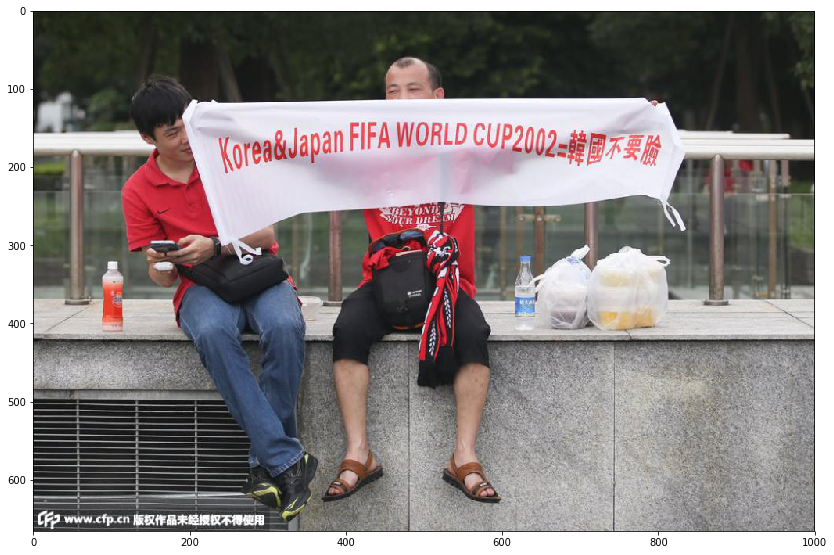

topwords of image:
0 终点线 2.1455|1 台阶 2.09641|2 剃头发 1.66584|3 集市 1.65484|4 道路 1.63278|5 伞 1.62422|6 横幅 1.58459|7 红布 1.57568|8 塑料袋 1.56813|9 冲线 1.45231|10 观光 1.43352|11 棚前 1.43335|12 声音 1.42933|13 卫衣 1.39843|14 衣扣 1.39272|15 麻袋 1.37448|16 红旗 1.34335|17 石阶 1.32138|18 外卖 1.27073|19 被子 1.26774|20 捶背 1.26079|21 涂鸦 1.25715|22 背带 1.2534|23 路旁 1.25302|24 土黄色 1.24949|25 拖箱 1.24905|26 触 1.23723|27 雨衣 1.21981|28 街道 1.21507|29 叉开 1.20881|30 抱 1.2019|31 咖啡 1.18572|32 围绕 1.18217|33 上脱 1.18169|34 捆着 1.1726|35 三轮车 1.17256|36 同 1.16657|37 系列 1.16182|38 牛仔裤 1.16017|39 摇摇 1.15994|40 路边 1.1464|41 民族服饰 1.14441|42 磕头 1.14295|43 明朗 1.14194|44 蓝 1.13764|45 究 1.13692|46 树荫 1.13271|47 屋前 1.12862|48 纹身 1.12481|49 幻 1.12185|50 八 1.12032|51 指路 1.11228|52 满字 1.10797|53 斗篷 1.10369|54 轮椅车 1.09873|55 奇特 1.09597|56 棕 1.08969|57 手拿碗 1.08146|58 捶腿 1.0761|59 盖头 1.07237|60 荣誉证书 1.07213|61 可乐 1.06815|62 上系 1.06714|63 后撑 1.06536|64 顶 1.06363|65 保温 1.05923|66 副 1.05565|67 袋子 1.05404|68 画像 1.05343|69 扒 1.05117|70 杂乱无章 1.04907|7

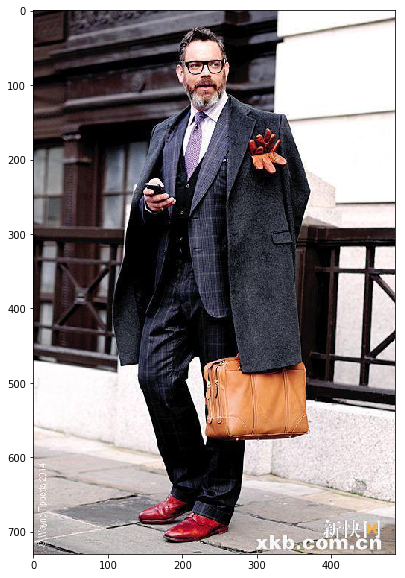

topwords of image:
0 原 1.59257|1 艺术 1.53173|2 玻璃 1.51943|3 西装 1.51252|4 台阶 1.48228|5 洗手台 1.45594|6 道路 1.44075|7 捂住 1.43846|8 围墙 1.41633|9 木架 1.40424|10 长褂 1.37595|11 半明半暗 1.35806|12 左手 1.35686|13 夹着烟 1.34076|14 乱石 1.33511|15 手拿包 1.3258|16 屋外 1.30112|17 西 1.29049|18 锅具 1.28358|19 长满 1.27078|20 倒冰 1.25734|21 左耳 1.24526|22 静 1.23562|23 小 1.23104|24 大 1.21911|25 马路 1.21632|26 夹克 1.21481|27 套装 1.19221|28 皮衣 1.18705|29 歪 1.1822|30 高大 1.16644|31 手枪 1.15983|32 倚靠在 1.15718|33 插进 1.15678|34 淡色 1.14985|35 等 1.1483|36 花纹 1.14815|37 裤装 1.14594|38 白头发 1.14533|39 胸卡 1.14228|40 货车 1.13198|41 金色 1.12635|42 乐 1.12509|43 铁棍 1.12395|44 弯 1.1235|45 山体 1.11428|46 房屋 1.1118|47 衣带 1.106|48 沙土 1.10555|49 适 1.10234|50 塑像 1.10079|51 吹奏 1.09944|52 楼下 1.0976|53 大气 1.09016|54 目视 1.08841|55 扣 1.08524|56 保护 1.08351|57 右手 1.08316|58 墙站 1.08102|59 通亮 1.07316|60 注视 1.07096|61 靠墙 1.06205|62 帅气 1.061|63 远方 1.05996|64 搜 1.05972|65 抬起 1.05817|66 提包 1.05579|67 坎坷 1.05477|68 脏乱 1.05435|69 映 1.05388|70 口袋 1.05187|71 绿 1.05105|

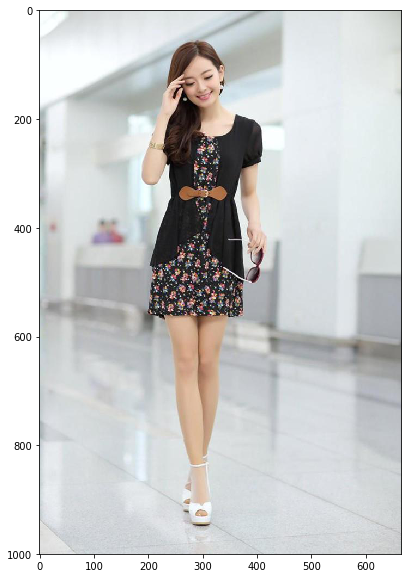

topwords of image:
0 大厅 2.39156|1 衣裙 2.35885|2 吐 1.88465|3 女人 1.86923|4 光滑 1.73595|5 回头 1.71939|6 充足 1.57352|7 敞亮 1.5641|8 霾 1.55847|9 双腿 1.54985|10 明亮 1.5494|11 走廊 1.53516|12 回着 1.50054|13 空旷 1.49846|14 右手 1.49599|15 举到 1.4757|16 告 1.45259|17 张望 1.45219|18 代 1.43187|19 路面 1.38428|20 歪 1.38116|21 左手腕 1.35137|22 右肩 1.32968|23 撩起 1.31762|24 飘飘 1.30334|25 上吊 1.30142|26 脚站 1.30021|27 白皙 1.27662|28 漂亮女孩 1.24161|29 站 1.22619|30 年轻 1.22254|31 左手 1.21879|32 打电话 1.21112|33 包扎着 1.20928|34 感 1.20078|35 裙角 1.19741|36 脑门 1.19603|37 左肩 1.19519|38 素净 1.19493|39 秀 1.18892|40 指纹 1.18036|41 远处 1.17934|42 光洁 1.17924|43 独特 1.17187|44 栋 1.17137|45 衣边 1.16617|46 手肘 1.16393|47 弯曲 1.16178|48 、 1.16159|49 两本 1.15629|50 美丽 1.15306|51 玻璃墙 1.15277|52 简洁 1.15099|53 满满地 1.1492|54 紧扣 1.14332|55 单肩 1.14331|56 短裙 1.14189|57 丝袜 1.14007|58 合拢 1.1304|59 平展 1.13012|60 卫生 1.13005|61 繁华 1.12578|62 卷帘门 1.11875|63 拿包 1.11682|64 游泳圈 1.11665|65 烁 1.1153|66 背包带 1.11225|67 歪头 1.11032|68 嘴里 1.11009|69 淡色 1.10591|70 双脚 1.10018|71 光

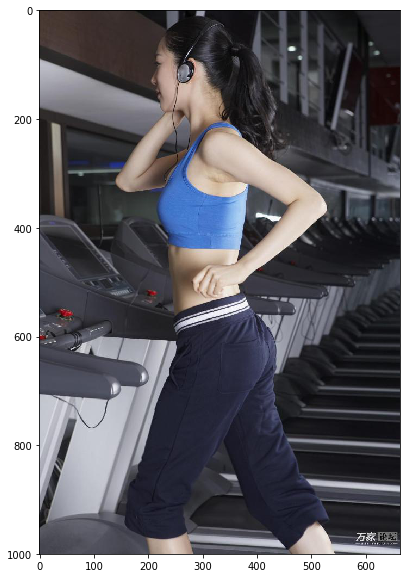

topwords of image:
0 搜 2.84085|1 货车 2.09416|2 手带 1.89542|3 听歌 1.80655|4 牛仔裤 1.79527|5 背心 1.79024|6 曲起 1.73896|7 两本 1.71957|8 室内 1.64387|9 裙角 1.62887|10 合拢 1.62393|11 肚脐 1.60625|12 落地 1.59943|13 拍照 1.57847|14 吊带 1.57415|15 展 1.56968|16 撩起 1.55613|17 回头 1.54983|18 尾 1.52644|19 司机 1.51463|20 女人 1.49578|21 草莓 1.48024|22 健身房 1.47676|23 护镜 1.46631|24 眉 1.45743|25 安全带 1.44135|26 防护 1.43765|27 内有 1.43178|28 位上 1.41679|29 夺 1.41671|30 班 1.3915|31 铐 1.38916|32 耳机 1.38559|33 图片 1.38238|34 游艇 1.37527|35 冰淇淋 1.37345|36 测 1.3657|37 音响 1.36491|38 脐 1.35186|39 上下车 1.34701|40 摄影棚 1.34605|41 跑步机 1.34523|42 心形 1.3389|43 电线杆 1.3351|44 左 1.33081|45 火车头 1.33044|46 刷卡 1.32893|47 交错 1.32873|48 车边 1.32565|49 剂 1.32146|50 满满地 1.32109|51 亲子 1.31963|52 撩 1.31687|53 睡衣 1.31383|54 下台阶 1.31171|55 饮品 1.30702|56 卧 1.30383|57 腰上 1.29356|58 睡裙 1.28584|59 遮阳 1.28414|60 拇指 1.27686|61 平台 1.27559|62 倚靠在 1.27532|63 包站 1.27463|64 挎包 1.26695|65 歪头 1.2643|66 峨 1.2565|67 左手腕 1.2522|68 抽着 1.24621|69 毒 1.24184|70 坠 1.24142|71 绚丽多姿

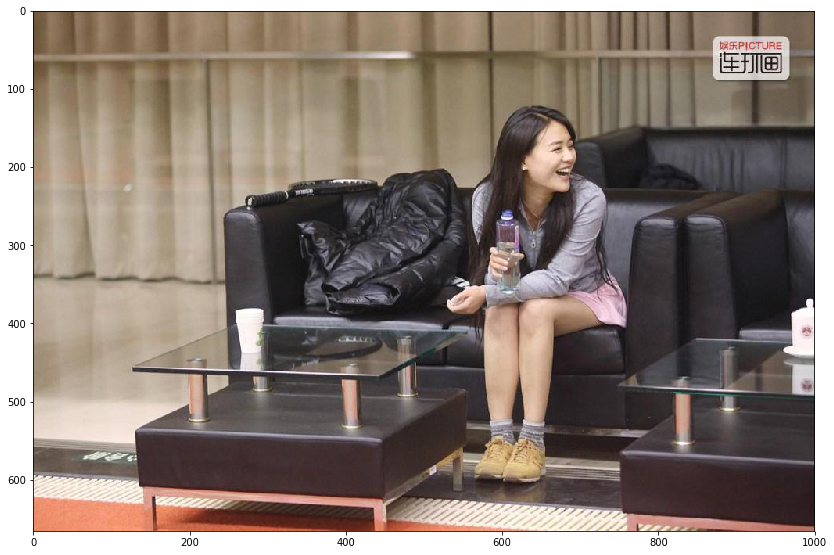

topwords of image:
0 沙发 2.26545|1 二郎腿 2.06644|2 桑拿房 1.85974|3 椅子 1.80632|4 座椅 1.79238|5 针线活 1.68257|6 题 1.58744|7 坐在 1.48947|8 玩 1.46575|9 椅背 1.45184|10 诊脉 1.45167|11 洁净 1.39086|12 正在 1.37395|13 庄严 1.36699|14 感 1.36619|15 摄影机 1.35833|16 招呼 1.35805|17 交 1.34709|18 右肘 1.34061|19 背靠 1.3336|20 互 1.29207|21 法院 1.28949|22 泡脚 1.28835|23 镖 1.26313|24 佯装 1.2425|25 眉 1.24162|26 黑色 1.22946|27 电车 1.2261|28 台阶 1.22577|29 杂乱无章 1.22371|30 嗑 1.22325|31 大喊 1.21574|32 人编 1.1891|33 听 1.18901|34 坐姿 1.18585|35 欢快 1.18312|36 手铐 1.17454|37 剧 1.17358|38 入场 1.1715|39 旁倒 1.15471|40 缎 1.15184|41 采访 1.1496|42 棚前 1.14499|43 放腿 1.14489|44 脚部 1.14205|45 硬 1.12506|46 候车厅 1.12476|47 到 1.12154|48 铁栅栏 1.1191|49 念 1.11756|50 皮尺 1.11751|51 没 1.11136|52 塞 1.10748|53 记录 1.09855|54 13 1.09659|55 轮椅车 1.09207|56 拖拉机 1.08614|57 健身球 1.07871|58 自拍 1.07837|59 蒙古包 1.07214|60 歪 1.07134|61 军大衣 1.06704|62 录制 1.06532|63 冰敷 1.06499|64 长凳 1.06381|65 录歌 1.06117|66 椅 1.05593|67 扯 1.05352|68 调节 1.05136|69 捆着 1.04699|70 皮裤 1.04407|71 案 1.044

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  # Size, in inches, of the output images.
  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

#   print('idf topwords of image:')
#   i = 0
#   idf_scores = [score * idf_weights[wid] for score, wid in zip(scores, word_ids)]
#   l = sorted(zip(idf_scores, word_ids), reverse=True)
#   for score, word_id in l:
#     print(i, vocab.key(int(word_id)), score, end='|')
#     i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))
    print('idf sim', idf_weights[vocab.id(text)] * predictor.predict([image], [text2ids.text2ids(text)]))

In [ ]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

names = ['5', '10', '15', '20', '25']
x = range(len(names))
y = [0.855, 0.84, 0.835, 0.815, 0.81]
y1=[0.86,0.85,0.853,0.849,0.83]
#plt.plot(x, y, 'ro-')
#plt.plot(x, y1, 'bo-')
#pl.xlim(-1, 11)  # 限定横轴的范围
#pl.ylim(-1, 110)  # 限定纵轴的范围
plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y1, marker='*', ms=10,label=u'y=x^3曲线图')
plt.legend()  # 让图例生效
plt.xticks(x, names, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"time(s)邻居") #X轴标签
plt.ylabel("RMSE") #Y轴标签
plt.title("A simple plot") #标题

plt.show()